1\. Write a function that converts number representation (bin<->dec<->hex)

In [8]:
def conv(n, base):
    if base == "bin":
        temp = int(n, 2)
        print("Number in decimal representation: ", temp)
        print("Number in hexadecimal representation: ", hex(temp))
    elif base == "dec":
        temp = int(n)
        print("Number in binary representation: ", bin(temp))
        print("Number in hexadecimal representation: ", hex(temp))
    elif base == "hex":
        temp = int(n, 16)
        print("Number in binary representation: ", bin(temp))
        print("Number in decimal representation: ", temp)
    else:
        print("Non valid conversion")
        
a = input("Insert a number in binary, decimal or hexadecimal base: ")
b = input("Specify the base, bin, dec or hex: ")
conv(a, b)

Insert a number in binary, decimal or hexadecimal base: 5
Specify the base, bin, dec or hex: dec
Number in binary representation:  0b101
Number in hexadecimal representation:  0x5


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [4]:
import random 

def spconv(st):
    if st[0] == 0:
        sgn = +1
    elif st[0] == 1:
        sgn = -1
    x = 0
    for i in range(1, 9):
        x += st[i]*(2**(8-i))
    exp = x - 127
    mant = 1.
    for j in range (9, len(st)):
        mant += st[j]*(2**(8-j))
    return(sgn*mant*(2**exp))
    
key = []

for i in range(32): 
    temp = random.randint(0, 1) 
    key.append(temp) 

print(key)
spconv(key)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]


-1.3708668094157685e+19

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [23]:
u = 1.
o = 1.

#UNDERFLOW
i = 0
while 1-u != 1:
    u /= 2
    i +=1

print("UNDERFLOW:")
print(u)
print("Number of iterations: ", i)
print(1-(1/(2**53)))
print(1-(1/(2**54)))

#OVERFLOW
j = 0
while o*2 != o:
    o *= 2
    j +=1

print("OVERFLOW:")
print(o)
print("Number of iterations: ", j)
print(2**1024)

UNDERFLOW:
5.551115123125783e-17
Number of iterations:  54
0.9999999999999999
1.0
OVERFLOW:
inf
Number of iterations:  1024
179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [43]:
val = input("Insert a value: ")
val = float(val)
temp = 0
i = 1
while val != temp:
    temp = 0
    temp = val + (2**(-i))
    i += 1
print("Number of iterations: ", i)
print("Machine precision: ", 2**(-i))

Insert a value: 4545
Number of iterations:  42
Machine precision:  2.2737367544323206e-13


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [17]:
import math as m
import numpy as np

def solutions1(c1, c2, c3):
    if (c2**2)-(4*c1*c3) >= 0:
        x1 = (-c2 + m.sqrt((c2**2)-(4*c1*c3)))/(2*c1)
        x2 = (-c2 - m.sqrt((c2**2)-(4*c1*c3)))/(2*c1)
        print("Solutions, first method: ", x1, x2)
        if c1 != 0:
            if c2/c1 == -(x1 + x2) and c3/c1 == x1*x2:
                print("Algorithm is working properly")
            else:
                print("Algorithm is not working properly")
        else:
            print("First grade equation")
    else:
        print("No real solutions.")
    
def solutions2(d1, d2, d3):
    if (d2**2)-(4*d1*d3) >= 0:
        y1 = ((-d2 + m.sqrt((d2**2)-(4*d1*d3)))*(-d2 - m.sqrt((d2**2)-(4*d1*d3))))/((2*d1)*(-d2 - m.sqrt((d2**2)-(4*d1*d3))))
        y2 = ((-d2 - m.sqrt((d2**2)-(4*d1*d3)))*(-d2 + m.sqrt((d2**2)-(4*d1*d3))))/((2*d1)*(-d2 + m.sqrt((d2**2)-(4*d1*d3))))
        print("Solutions, second method: ", y1, y2)
        if d1 != 0:
            if d2/d1 == -(y1 + y2) and d3/d1 == y1*y2:
                print("Algorithm is working properly")
            else:
                print("Algorithm is not working properly")
        else:
            print("First grade equation")
    else:
        print("No real solutions.")
        
def solutions(c1, c2, c3):
    if (c2**2)-(4*c1*c3) >= 0:
        x1 = (-c2 - (np.sign(c2)*m.sqrt((c2**2)-(4*c1*c3))))/(2*c1)
        x2 = c3/(c1*x1)
        print("Solutions, third method: ", x1, x2)
        if c1 != 0:
            if c2/c1 == -(x1 + x2) and c3/c1 == x1*x2:
                print("Algorithm is working properly")
            else:
                print("Algorithm is not working properly")
        else:
            print("First grade equation")
    else:
        print("No real solutions.")

a = input("Insert parameter a: ")
a = float(a)
b = input("Insert parameter b: ")
b = float(b)
c = input("Insert parameter c: ")
c = float(c)

solutions1(a, b, c)
solutions2(a, b, c)
solutions(a, b, c)

Insert parameter a: 0.001
Insert parameter b: 1000
Insert parameter c: 0.001
Solutions, first method:  -9.999894245993346e-07 -999999.999999
Algorithm is not working properly
Solutions, second method:  -9.999894245993346e-07 -999999.9999990001
Algorithm is not working properly
Solutions, third method:  -999999.999999 -1.000000000001e-06
Algorithm is working properly


First and second methods are affected by loss of significance when calculating the solutions. This is due to the fact that $b >> a,c$. By multiplying the standard formula top and bottom by $-b\mp\sqrt{b^2-4ac}$, we remove the loss from the upper member, but at the same time we move it to the lower one. So both the first and the second algorithm gives bad results. 

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Value of the analytical derivative in x=1:  1
Value of the computed derivative in x=1 for delta = 10^-2:  1.010000000000001
Since delta is a small number, the difference between f calculated in x and f calculated in x+delta,
is related to a large rounding error. For this reason the computed derivative doesn't match perfectly with the analytical one.
[-1.9999999999999996, -3.999999999999999, -5.999999999999999, -8.0, -10.0, -11.999999999999998, -14.0]
[-1.9999999999999611, -4.000000000478354, -6.000035729452325, -8.40643386500152, -7.081757964750937, -4.051095389298782, -3.0973022291299896]
Rounding error is also present in the calculation of logarithms
In the graph below are plotted the logarithms of the differences between the computed derivatives and the analytical ones 
in function of the logarithms of the corresponding deltas.


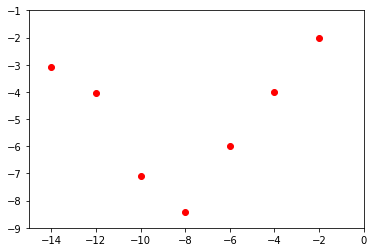

In [6]:
import math as m
from matplotlib import pyplot as plt

def f(x):
    func = x*(x-1)
    return func

def df(x, d):
    der = (f(x+d)-f(x))/d
    return der

def adf(x):
    return (2*x)-1

print("Value of the analytical derivative in x=1: ", adf(1))
delta = 10**(-2)
print("Value of the computed derivative in x=1 for delta = 10^-2: ", df(1, delta))
print("Since delta is a small number, the difference between f calculated in x and f calculated in x+delta,\nis related to a large rounding error. For this reason the computed derivative doesn't match perfectly with the analytical one.")

X = []
Y = []
for i in range(1, 8):
    n = 2*i
    delta = 10**(-n)
    diff = abs(adf(1) - df(1, delta))
    X.append(m.log(delta, 10))
    Y.append(m.log(diff, 10))
print(X)
print(Y)
print("Rounding error is also present in the calculation of logarithms")
print("In the graph below are plotted the logarithms of the differences between the computed derivatives and the analytical ones \nin function of the logarithms of the corresponding deltas.")
plt.xlim(-15, 0)
plt.ylim(-9, -1)
plt.plot(X, Y, color="red", marker="o", linestyle="")
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [67]:
import math as m
import time
#from datetime import datetime, timedelta

def f(x):
    func = m.sqrt(1-(x**2))
    return func

def integral(N):
    h = 2/N
    xin = -1.
    I = 0.
    for i in range(0, N):
        xi = xin + (h*i)
        I += f(xi)*h
    print("The computed value of the integral with N =", N,"steps is: ", I)
    print("The difference with the analytical value is: ", abs(I - (m.pi/2)))

def t_integral(N):
    h = 2/N
    xin = -1.
    I = 0.
    start = time.time()
    for i in range(0, N):
        xi = xin + (h*i)
        I += f(xi)*h
    stop = time.time() - start
    print("For N =", N, "steps the program runs for", stop, "seconds and I =", I)
    print("The difference with the analytical value is: ", abs(I - (m.pi/2)))
    

print("The true value of the integral is: ", m.pi/2)
integral(100)
t_integral(1727000)
t_integral(99970000)

The true value of the integral is:  1.5707963267948966
The computed value of the integral with N = 100 steps is:  1.5691342555492505
The difference with the analytical value is:  0.0016620712456461018
For N = 1727000 steps the program runs for 0.9854483604431152 seconds and I = 1.5707963260622702
The difference with the analytical value is:  7.326264039875241e-10
For N = 99970000 steps the program runs for 55.26412487030029 seconds and I = 1.5707963267932978
The difference with the analytical value is:  1.5987211554602254e-12
